In [1]:
#Essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv 
import datetime as dt

#For scraping Reddit
import praw
from psaw import PushshiftAPI

#For EDA
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
import sklearn.cluster
import sklearn.decomposition
import matplotlib.colors
from textblob import TextBlob
from gensim.models import Word2Vec
import nltk
import nltk.corpus
from nltk.corpus import nps_chat, wordnet
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import NaiveBayesClassifier
from nltk import TweetTokenizer
import textstat
import gensim.corpora as corpora
from pprint import pprint
import gensim
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import gensim.corpora as corpora
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
import emot
import demoji
import contractions
from spellchecker import SpellChecker
from pprint import pprint

C:\Users\Julia\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [31]:
nltk.download('punkt')
nltk.download('nps_chat')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Julia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\Julia\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Julia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Julia\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Julia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Julia\AppData\Roaming\nltk_data...


True

# Mental Heatlh

In [2]:
#Thanks to dmarx for the clear code on pulling from PSAW! PSAW docs are surprisingly unclear.
#https://github.com/dmarx/psaw
api = PushshiftAPI()

#Start date we're beginning to pull posts from
start_epoch=int(dt.datetime(2010, 1, 1).timestamp())


#Pulling submissions from mentalhealth (both the title and body of a post)

gen_subMH = list(api.search_submissions(after=start_epoch,
                            subreddit='mentalhealth',
                            filter=['title', 'id','score','link_flair_text','selftext'],
                            limit=1000000))


#Converting to dataframe
MHsub = pd.DataFrame([thing.d_ for thing in gen_subMH])


C:\Users\Julia\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
C:\Users\Julia\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
C:\Users\Julia\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


In [3]:
MHsub.to_csv('../Data/MHsub.csv',index=False)

In [4]:
#Pulling comments from mental health

gen_comMH = api.search_comments(after=start_epoch, 
                            subreddit='mentalhealth',
                            filter=['body', 'link_id', 'id', 'score','submission'],
                            #link_id = new_idsMH,
                            limit=35000000)

MHcom = pd.DataFrame([thing.d_ for thing in gen_comMH])

C:\Users\Julia\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
C:\Users\Julia\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
C:\Users\Julia\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


In [5]:
MHcom.to_csv('../Data/MHcom.csv',index=False)

# Mental Illness subreddit

In [6]:
gen_subMI = list(api.search_submissions(after=start_epoch,
                            subreddit='mentalillness',
                            filter=['title', 'id','score','link_flair_text','selftext'],
                            limit=1000000))


#Converting to dataframe
MIsub = pd.DataFrame([thing.d_ for thing in gen_subMI])

C:\Users\Julia\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
C:\Users\Julia\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
C:\Users\Julia\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


In [7]:
MIsub.to_csv('../Data/MIsub.csv',index=False)

In [8]:
gen_comMI = api.search_comments(after=start_epoch, 
                            subreddit='mentalillness',
                            filter=['body', 'link_id', 'id', 'score','submission'],
                            #link_id = new_MIids,
                            limit=35000000)

MIcom = pd.DataFrame([thing.d_ for thing in gen_comMI])

C:\Users\Julia\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
C:\Users\Julia\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
C:\Users\Julia\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


In [9]:
MIcom.to_csv('../Data/MIcom.csv',index=False)

# Loading the data

In [2]:
MHsub = pd.read_csv('../Data/MHsub.csv')
MHcom = pd.read_csv('../Data/MHcom.csv')
MIsub = pd.read_csv('../Data/MIsub.csv')
MIcom = pd.read_csv('../Data/MIcom.csv')

# Cleaning the data

# We can merge submissions from mentalhealth and mentalillness subreddits

In [3]:
all_sub = pd.concat([MHsub,MIsub])
all_sub.reset_index(inplace=True,drop=True)

In [4]:
all_sub

,created_utc,id,score,selftext,title,created,link_flair_text
0,1663534517,xhrtbf,1,I don’t entirely want to reach out to people h...,How do I stop villainizing myself.,1.663549e+09,NaN
1,1663534244,xhrpbh,1,"I suffer from anxiety attacks regularly, usual...",is this a panic attack or something else?,1.663549e+09,NaN
2,1663533992,xhrlh6,1,I've been having these thoughts lately like\n\...,do you ever feel like not being alive anymore,1.663548e+09,NaN
3,1663533274,xhrats,1,"For some miraculous reason, I got a girlfriend...",Being normal,1.663548e+09,Opinion / Thoughts
4,1663533255,xhrajv,1,I've been going through a hard time lately and...,why do depressed people shave their heads,1.663548e+09,NaN
...,...,...,...,...,...,...,...
415285,1353891546,13sbe9,1,NaN,I look again to make sure so one is near me an...,1.353906e+09,NaN
415286,1348724331,10juc6,1,NaN,"NAMI | Peer-to-Peer is a unique, experiential ...",1.348739e+09,NaN
415287,1344639905,y0sqy,0,AMA,I am rooster illusion,1.344654e+09,NaN
415288,1321506737,mfckr,1,so i have a lot of random impluses. crazy shit...,crazy motherfucker,1.321521e+09,NaN


In [5]:
all_sub['created'] = pd.to_datetime(all_sub['created'], unit='s')

In [6]:
all_sub = all_sub.drop(columns=['created_utc','score','link_flair_text'])

In [7]:
all_sub = all_sub.rename(columns={'selftext': 'post_body'})

In [8]:
#making the title & post_body lowercase for future processing.
all_sub['post_body'] = all_sub['post_body'].astype(str)
all_sub['title'] = all_sub['title'].astype(str)
all_sub['title'] = all_sub['title'].apply(lambda x: x.lower())
all_sub['post_body'] = all_sub['post_body'].apply(lambda x: x.lower())

# Merging two dataframes with comments

In [9]:
all_com = pd.concat([MHcom,MIcom])

In [10]:
all_com

,body,created_utc,id,link_id,score,created
0,[removed],1663536087,iozbxkr,t3_xhsag5,1,1.663550e+09
1,Bro it seems you may actually delusional no ju...,1663536013,iozbqlk,t3_xhsag5,1,1.663550e+09
2,Thank you for for sharing. A reminder: if you ...,1663535972,iozbmub,t3_xhsf3f,1,1.663550e+09
3,Thanks,1663535958,iozbljf,t3_xhkzmw,1,1.663550e+09
4,I definitely have body image issues and I’m th...,1663535919,iozbi1l,t3_xhkzmw,1,1.663550e+09
...,...,...,...,...,...,...
195872,This further stigmatizes mental illness. It do...,1388387508,ced74e0,t3_1r79dm,3,1.388402e+09
195873,I hear ya. Sister suffers from bi-polar and mi...,1388367327,cecz8pw,t3_1qbx9v,2,1.388382e+09
195874,If i have to read another overwrought analogy ...,1387557036,ce6e980,t3_1r79dm,2,1.387571e+09
195875,"Ugh, that's atrocious. Just because I can't w...",1385376904,cdmivce,t3_1r79dm,7,1.385391e+09


In [11]:
all_com['body'] = all_com['body'].astype('string')

In [239]:
# removing all duplicate comments which mostly include automatic replies from bots or [removed] and [deleted] comments
all_com = all_com[~all_com.body.duplicated(keep=False)].reset_index(drop=True)

In [241]:
# list of indexes of all comments that have only one word.
one_word = list(all_com[[len(i.split())==1 for i in all_com['body'].values]].index)
# dropping all the comments that have one word only
all_com = all_com.drop(index=one_word).reset_index(drop=True)

In [243]:
# grouping all comments with the same link_id (i.e. beloning to the same submission)
all_com = pd.DataFrame(all_com.groupby('link_id')['body'].sum()).reset_index(level=0)

In [244]:
# removing 't3_' from link_id to find a match in dataframe withs submissions
all_com['link_id'] = all_com.link_id.map(lambda x: x.strip("t3_"))
all_com.rename(columns={'link_id':'id'},inplace=True)

In [252]:
# merging submissions and comments on their id
all_data = pd.merge(all_sub,all_com,how='left',on=['id'])

In [255]:
all_data = all_data[all_data['body'] != '<NA>'].reset_index(drop=True)

In [257]:
all_data.rename(columns = {'body':'comment_body'},inplace=True)
all_data.head()

,id,post_body,title,created,comment_body
0,xhrlh6,i've been having these thoughts lately like\n\...,do you ever feel like not being alive anymore,2022-09-19 00:46:32,As for anchors My only anchor is I need to be ...
1,xhrajv,i've been going through a hard time lately and...,why do depressed people shave their heads,2022-09-19 00:34:15,I don’t know because I never had the urge but ...
2,xhr49p,idk why but every now and then i'll just get t...,random urge to kill people,2022-09-19 00:27:15,You are a coward that can't handle the fact th...
3,xhq4pa,i have ocd that gives me intrusive thoughts ab...,need a therapist that specializes in concernin...,2022-09-18 23:46:40,Unless there is an actual crime or abuse to re...
4,xhpsmb,"i have no friends, i don't like my family at a...",17m i think i should end my life early,2022-09-18 23:33:01,"Aye yes, I know when I get depressed I sit in ..."


# Since we're only interested in submissions that have a question, we will need to analyze all the titles of submission and check if they are questions of not

In [260]:
question_words = ["what", "why", "when", "where", "name", "is", "how", "do", "does", 
                  "which", "are", "could", "would", "should", "has", "have", "whom", 
                  "whose", "don't",'am','can',"do i", "do you", "what", "who", "is it", 
                  "why","would you", "how","is there","are there", "is it so", "is this true" ,
                  "to know", "is that true", "are we", "am i", "question is", "tell me more", 
                  "can i", "can we", "tell me", "can you explain","didn't","doesn't","haven't","isn't","aren't","can't","couldn't","wouldn't","won't","shouldn't"]

def is_question(text):
    question = text.lower()
    question = word_tokenize(question)
    if any(x in question[0] for x in question_words):
        res = True
    else:
        res = False
    return res

In [261]:
all_data['question'] = all_data.title.apply(is_question)

In [17]:
### adapted from https://github.com/kartikn27/nlp-question-detection/blob/master/method2.py
class IsQuestion():
    
    # Init constructor
    def __init__(self):
        posts = self.__get_posts()
        feature_set = self.__get_feature_set(posts)
        self.classifier = self.__perform_classification(feature_set)
        
    # get_posts
    def __get_posts(self):
        return nltk.corpus.nps_chat.xml_posts()
    
    # get_feature_set
    def __get_feature_set(self, posts):
        feature_list = []
        for post in posts:
            post_text = post.text            
            features = {}
            words = nltk.word_tokenize(post_text)
            for word in words:
                features['contains({})'.format(word.lower())] = True
            feature_list.append((features, post.get('class')))
        return feature_list
    
    # perform_classification
    def __perform_classification(self, feature_set):
        training_size = int(len(feature_set) * 0.1)
        train_set, test_set = feature_set[training_size:], feature_set[:training_size]
        classifier = nltk.NaiveBayesClassifier.train(train_set)
        print('Accuracy is : ', nltk.classify.accuracy(classifier, test_set))
        return classifier
        
    #  get_question_words_set
    def __get_question_words_set(self):
        question_word_list = ['what', 'where', 'when','how','why','did','do','does','have','has','am','is','are',
                              'can','could','may','would','will','should',"has", "have", "whom",'whose',"didn't",
                              "doesn't","haven't","isn't","aren't","can't","couldn't","wouldn't","won't","shouldn't",'?',
                             "what", "why", "when", "where", "name", "is", "how", "do", "does", 
                  "which", "are", "could", "would", "should", "has", "have", "whom", 
                  "whose", "don't",'am','can',"do i", "do you", "what", "who", "is it", 
                  "why","would you", "how","is there","are there", "is it so", "is this true" ,
                  "to know", "is that true", "are we", "am i", "question is", "tell me more", 
                  "can i", "can we", "tell me", "can you explain","didn't","doesn't","haven't","isn't","aren't","can't","couldn't","wouldn't","won't","shouldn't"]
        return set(question_word_list)        
    
    # predict_question
    def predict_question(self, text):
        words = nltk.word_tokenize(text.lower())        
        if self.__get_question_words_set().intersection(words) == False:
            return 0
        if '?' in text:
            return 1
        
        features = {}
        for word in words:
            features['contains({})'.format(word.lower())] = True            
        
        prediction_result = self.classifier.classify(features)
        if prediction_result == 'whQuestion' or prediction_result == 'ynQuestion':
            return 1
        return 0

isQ = IsQuestion()

Accuracy is :  0.6685606060606061


In [266]:
all_data['is_question'] = all_data['title'].apply(isQ.predict_question)

In [267]:
all_data

,id,post_body,title,created,comment_body,question,is_question
0,xhrlh6,i've been having these thoughts lately like\n\...,do you ever feel like not being alive anymore,2022-09-19 00:46:32,As for anchors My only anchor is I need to be ...,True,0
1,xhrajv,i've been going through a hard time lately and...,why do depressed people shave their heads,2022-09-19 00:34:15,I don’t know because I never had the urge but ...,True,0
2,xhr49p,idk why but every now and then i'll just get t...,random urge to kill people,2022-09-19 00:27:15,You are a coward that can't handle the fact th...,True,0
3,xhq4pa,i have ocd that gives me intrusive thoughts ab...,need a therapist that specializes in concernin...,2022-09-18 23:46:40,Unless there is an actual crime or abuse to re...,False,0
4,xhpsmb,"i have no friends, i don't like my family at a...",17m i think i should end my life early,2022-09-18 23:33:01,"Aye yes, I know when I get depressed I sit in ...",False,0
...,...,...,...,...,...,...,...
202303,2glqvl,i've been struggling with mental illness (depr...,"does mental illness, with a suicide attempt, q...",2014-09-17 02:26:12,Yes. It is a life threatening illness. You wil...,True,1
202304,2ea7v6,"so, i am getting really bad. i hear strange to...",i am scared. everything in here and on /r/depr...,2014-08-22 19:17:29,I see mental illness as a disease that gets yo...,False,0
202305,27k65x,my husband and i are both pretty fucked up rig...,losing it,2014-06-07 21:27:59,It's unfortunate to hear that one good thing l...,False,0
202306,200k7v,nan,love suicide,2014-03-10 06:24:27,Just posted a link to a blog post I did on men...,False,0


In [268]:
# since both ways i used are not perfectly accurate, I'm going to keep rows that have 'question' != False and "is_question" != 0
all_data = all_data.loc[~((all_data['question'] == False) & (all_data['is_question'] == 0))]

In [270]:
all_data = all_data.drop(columns=['question','is_question']).reset_index(drop=True)

In [271]:
all_data

,id,post_body,title,created,comment_body
0,xhrlh6,i've been having these thoughts lately like\n\...,do you ever feel like not being alive anymore,2022-09-19 00:46:32,As for anchors My only anchor is I need to be ...
1,xhrajv,i've been going through a hard time lately and...,why do depressed people shave their heads,2022-09-19 00:34:15,I don’t know because I never had the urge but ...
2,xhr49p,idk why but every now and then i'll just get t...,random urge to kill people,2022-09-19 00:27:15,You are a coward that can't handle the fact th...
3,xhowxf,"when i get really anxious, i slap my arm and t...",is slapping my arm when i’m anxious normal?,2022-09-18 22:58:06,"'Normal' and 'crazy' aren't binary opposites, ..."
4,xhovdn,i’ve been to a few psychiatrists/therapists ov...,tips to find a psychiatrist that specializes i...,2022-09-18 22:56:17,I would assume the majority are aware of anxie...
...,...,...,...,...,...
82561,2wigq2,"i'm not looking for a diagnosis, just some ins...",have you heard of this?,2015-02-20 08:05:16,I assume you have some sort of existing medica...
82562,2vr17i,how do i find friends to have adventures with ...,how do i stop my intensity?,2015-02-13 13:12:20,I have been diagnosed officially and I am not ...
82563,2s5g3q,oftain if someone will repeat a word directly ...,does this have a name?,2015-01-12 13:36:53,"I asked my councillor but he wasn't too sure, ..."
82564,2n3gpd,the patterns of loosely related random words a...,do schizophrenics 'understand' other schizophr...,2014-11-22 22:08:51,I don't think it works that way. I do find tha...


In [273]:
# Dropping the columns that doesn't encode useful information and renaming the columns nicely for intepretability
all_data.drop(['id','created'], axis = 1, inplace = True)

In [282]:
# Replacing emojis with text
with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
    return text
# Example
text = "I won 🥇 in 🏏"
convert_emojis_to_word(text)

'I won 1st_place_medal in cricket'

In [283]:
all_data['title'] = all_data['title'].apply(convert_emojis_to_word)

In [285]:
all_data['post_body'] = all_data['post_body'].apply(convert_emojis_to_word)

In [286]:
all_data['comment_body'] = all_data['comment_body'].apply(convert_emojis_to_word)

In [287]:
all_data.to_csv('../Data/all_data.csv',index=False)

# Load the data not to run the code above all over again

In [109]:
all_data = pd.read_csv('../Data/all_data.csv')

In [37]:
all_data

,post_body,title,comment_body
0,i've been having these thoughts lately like\n\...,do you ever feel like not being alive anymore,As for anchors My only anchor is I need to be ...
1,i've been going through a hard time lately and...,why do depressed people shave their heads,I don’t know because I never had the urge but ...
2,idk why but every now and then i'll just get t...,random urge to kill people,You are a coward that can't handle the fact th...
3,"when i get really anxious, i slap my arm and t...",is slapping my arm when i’m anxious normal?,"'Normal' and 'crazy' aren't binary opposites, ..."
4,i’ve been to a few psychiatrists/therapists ov...,tips to find a psychiatrist that specializes i...,I would assume the majority are aware of anxie...
...,...,...,...
82561,"i'm not looking for a diagnosis, just some ins...",have you heard of this?,I assume you have some sort of existing medica...
82562,how do i find friends to have adventures with ...,how do i stop my intensity?,I have been diagnosed officially and I am not ...
82563,oftain if someone will repeat a word directly ...,does this have a name?,"I asked my councillor but he wasn't too sure, ..."
82564,the patterns of loosely related random words a...,do schizophrenics 'understand' other schizophr...,I don't think it works that way. I do find tha...


In [38]:
# lower all text
all_data = all_data.apply(lambda x: x.str.lower())

In [5]:
# convert to string
all_data = all_data.astype('string')

In [39]:
# replace all duplicated post_body with null values
duplicated = all_data.duplicated('post_body')
all_data.loc[duplicated, ['post_body']] = " "

In [7]:
# merge title and post_body
all_data['title'] = all_data['title'] + ' '  + all_data['post_body']

In [8]:
all_data.drop(columns=['post_body'],inplace=True)

In [40]:
all_data = all_data.dropna()

In [2]:
# remove links
def remove_links(doc):
    return [re.sub(r'^https?:\/\/.*[\r\n]*', '', token, flags=re.MULTILINE) for token in doc]
all_data = all_data.astype('string').apply(lambda x: remove_links(x))

In [9]:
# remove punctuation
import string
punctuation = ['\u200d','?', '....','..','...','','@','#', ',', '.', '"', ':', ')', '(', '-', '!', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '*', '+', '\\', 
    '•', '~', '£', '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', 
    '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', 
    '—', '‹', '─', '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 
    'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', 
    '¹', '≤', '‡', '√', '!','🅰','🅱', "\n"]
def remove_punct(string):
    for el in string:
        if el in punctuation:
            string = string.replace(el, "")
    return string
all_data['title'] = all_data.title.apply(lambda x: remove_punct(x))
all_data['comment_body'] = all_data.comment_body.apply(lambda x: remove_punct(x))
all_data['post_body'] = all_data.post_body.apply(lambda x: remove_punct(x))

In [42]:
all_data

,post_body,title,comment_body
0,i've been having these thoughts lately like\n\...,do you ever feel like not being alive anymore,as for anchors my only anchor is i need to be ...
1,i've been going through a hard time lately and...,why do depressed people shave their heads,i don’t know because i never had the urge but ...
2,idk why but every now and then i'll just get t...,random urge to kill people,you are a coward that can't handle the fact th...
3,"when i get really anxious, i slap my arm and t...",is slapping my arm when i’m anxious normal?,"'normal' and 'crazy' aren't binary opposites, ..."
4,i’ve been to a few psychiatrists/therapists ov...,tips to find a psychiatrist that specializes i...,i would assume the majority are aware of anxie...
...,...,...,...
82561,"i'm not looking for a diagnosis, just some ins...",have you heard of this?,i assume you have some sort of existing medica...
82562,how do i find friends to have adventures with ...,how do i stop my intensity?,i have been diagnosed officially and i am not ...
82563,oftain if someone will repeat a word directly ...,does this have a name?,"i asked my councillor but he wasn't too sure, ..."
82564,the patterns of loosely related random words a...,do schizophrenics 'understand' other schizophr...,i don't think it works that way. i do find tha...


In [11]:
# remove digits
all_data['title'] = all_data['title'].str.replace('\\d+', '')
all_data['comment_body'] = all_data['comment_body'].str.replace('\\d+', '')
all_data['post_body'] = all_data['post_body'].str.replace('\\d+', '')

C:\Users\Julia\AppData\Local\Temp\ipykernel_25384\3207686.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data['title'] = all_data['title'].str.replace('\\d+', '')
C:\Users\Julia\AppData\Local\Temp\ipykernel_25384\3207686.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data['comment_body'] = all_data['comment_body'].str.replace('\\d+', '')
C:\Users\Julia\AppData\Local\Temp\ipykernel_25384\3207686.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data['post_body'] = all_data['post_body'].str.replace('\\d+', '')


In [48]:
# expand contractions
all_data['title'] = all_data.title.apply(lambda x: contractions.fix(x))
all_data['comment_body'] = all_data.comment_body.apply(lambda x: contractions.fix(x))
all_data['post_body'] = all_data.post_body.apply(lambda x: contractions.fix(x))

In [49]:
# remove emojis that weren't converted into text
def remove_em(text):
    dem = demoji.findall(text)
    for item in dem.keys():
        text = text.replace(item, "")
    return text
all_data['title'] = all_data.title.apply(remove_em)
all_data['comment_body'] = all_data.comment_body.apply(remove_em)
all_data['post_body'] = all_data.post_body.apply(remove_em)

In [43]:
# remove extra space between tokens
def remove_space(string):
    result = re.sub('\\s+',' ', string)
    return result
all_data['title'] = all_data.title.apply(remove_space)
all_data['comment_body'] = all_data.comment_body.apply(remove_space)
all_data['post_body'] = all_data.post_body.apply(remove_space)

In [20]:
# tokenize all text
def word_tokenize(sentence):
    return sentence.split()
all_data = all_data.apply(lambda x: word_tokenize(x.str))

In [23]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [32]:
# Lemmatize words
lemmatizer = WordNetLemmatizer()
def lemmatize_text(x):
    ''' This lemmatizer fuunction should work on a single list of tokenized data'''
    # Turning list into a string
    x = " ".join(x)
    # Returning a list again
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x)]
all_data['title'] = all_data.title.apply(lemmatize_text)
all_data['comment_body'] = all_data.comment_body.apply(lemmatize_text)

In [44]:
all_data

,post_body,title,comment_body
0,"i've been having these thoughts lately like ""t...",do you ever feel like not being alive anymore,as for anchors my only anchor is i need to be ...
1,i've been going through a hard time lately and...,why do depressed people shave their heads,i don’t know because i never had the urge but ...
2,idk why but every now and then i'll just get t...,random urge to kill people,you are a coward that can't handle the fact th...
3,"when i get really anxious, i slap my arm and t...",is slapping my arm when i’m anxious normal?,"'normal' and 'crazy' aren't binary opposites, ..."
4,i’ve been to a few psychiatrists/therapists ov...,tips to find a psychiatrist that specializes i...,i would assume the majority are aware of anxie...
...,...,...,...
82561,"i'm not looking for a diagnosis, just some ins...",have you heard of this?,i assume you have some sort of existing medica...
82562,how do i find friends to have adventures with ...,how do i stop my intensity?,i have been diagnosed officially and i am not ...
82563,oftain if someone will repeat a word directly ...,does this have a name?,"i asked my councillor but he wasn't too sure, ..."
82564,the patterns of loosely related random words a...,do schizophrenics 'understand' other schizophr...,i don't think it works that way. i do find tha...


In [45]:
all_data.to_csv('../Data/all_data2.csv',index=False)

In [46]:
#adding encoding for GPT to recognize the start of the text, the prompt ([WP]), followed by the comment
#[RESPONSE], and the end of the text. I'm combining the two into one column so it can more easily be 
#assimilated into a .txt file.
all_data['title'] = '<|startoftext|>[WP]' + all_data['title'].astype(str)

In [47]:
all_data['comment_body'] = '[RESPONSE]' + all_data['comment_body'].astype(str) + '<|endoftext|>'

In [48]:
all_data['GPT2_data'] = all_data[['title', 'comment_body']].agg(' '.join, axis='columns')

In [49]:
GPT2_data = all_data[['GPT2_data']].copy()

In [50]:
GPT2_data

,GPT2_data
0,<|startoftext|>[WP]do you ever feel like not b...
1,<|startoftext|>[WP]why do depressed people sha...
2,<|startoftext|>[WP]random urge to kill people ...
3,<|startoftext|>[WP]is slapping my arm when i’m...
4,<|startoftext|>[WP]tips to find a psychiatrist...
...,...
82561,<|startoftext|>[WP]have you heard of this? [RE...
82562,<|startoftext|>[WP]how do i stop my intensity?...
82563,<|startoftext|>[WP]does this have a name? [RES...
82564,<|startoftext|>[WP]do schizophrenics 'understa...


In [51]:
GPT2_data.to_csv("../Data/GPT2_data.csv", index=False)

In [52]:
#conversion to .txt
with open('../Data/GPT2_data.csv', 'r', encoding="utf8") as inp, open('../Data/GPT2_data.txt', 'w', encoding='utf-8') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [2]:
all_data2 = pd.read_csv('../Data/all_data2.csv')

# Sentiment analysis and EDA

In [4]:
all_data2 = all_data2.drop(columns=['post_body'])

In [8]:
all_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82548 entries, 0 to 82564
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         82548 non-null  object
 1   comment_body  82548 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [6]:
all_data2['comment_body'] = all_data2.comment_body.drop_duplicates(keep=False)

In [7]:
all_data2.dropna(inplace=True)

In [9]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Next we remove stop words and lemmatize text using spacy

In [10]:
all_data2['lemmatized_title']=all_data2['title'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [11]:
all_data2['lemmatized_comment']=all_data2['comment_body'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [12]:
'''# remove stop words
def remove_stopwords(token_list):
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in token_list if not w.lower() in stop_words]
    #filtered_sentence = ' '.join(filtered_sentence)
    return filtered_sentence
all_data['cleaned_title'] = all_data.title.apply(remove_stopwords)
all_data['cleaned_comment'] = all_data.comment_body.apply(remove_stopwords)'''

"# remove stop words\ndef remove_stopwords(token_list):\n    stop_words = set(stopwords.words('english'))\n    filtered_sentence = [w for w in token_list if not w.lower() in stop_words]\n    #filtered_sentence = ' '.join(filtered_sentence)\n    return filtered_sentence\nall_data['cleaned_title'] = all_data.title.apply(remove_stopwords)\nall_data['cleaned_comment'] = all_data.comment_body.apply(remove_stopwords)"

In [13]:
# Writing a function to plot the counts that are in the data

def top10_bagofwords(data, title):
    ''' Taking as input the data and plots the top 10 words based on counts in this text data'''
    bagofwords = CountVectorizer()
    inbound = bagofwords.fit_transform(data)
    inbound # Output will be a sparse matrix
    # Inspecting of often contractions and colloquial language is used
    word_counts = np.array(np.sum(inbound, axis=0)).reshape((-1,))
    words = np.array(bagofwords.get_feature_names())
    words_df = pd.DataFrame({"word":words, 
                             "count":word_counts})
    words_rank = words_df.sort_values(by="count", ascending=False)
    return words_rank

In [14]:
word_rank_title = top10_bagofwords(all_data2.lemmatized_title, "top")
word_rank_comment = top10_bagofwords(all_data2.lemmatized_comment, "top")

C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


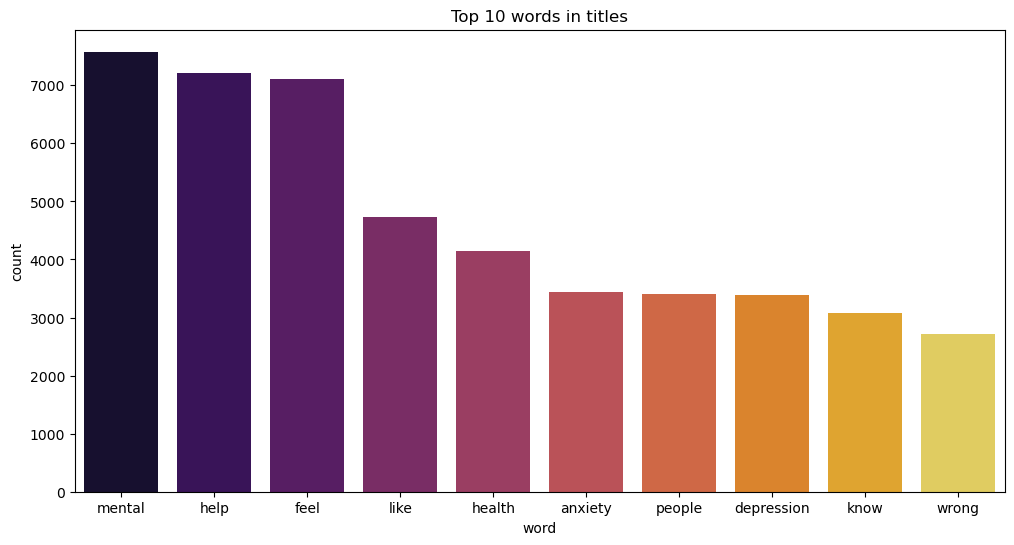

In [15]:
# Visualizing top 10 words
plt.figure(figsize=(12,6))
sns.barplot(x=word_rank_title['word'][:10], y=word_rank_title['count'][:10], palette = 'inferno')
plt.title('Top 10 words in titles') 
plt.show()

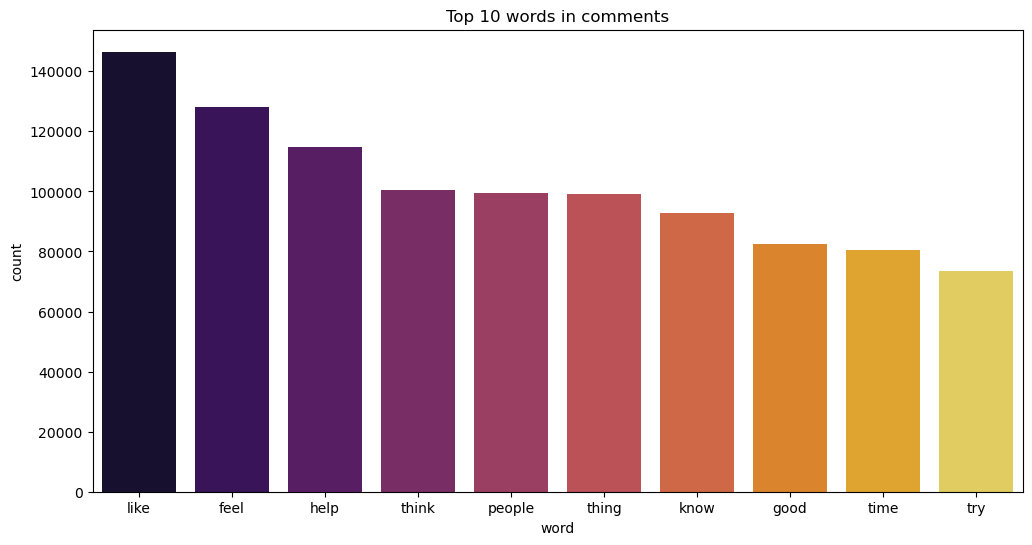

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x=word_rank_comment['word'][:10], y=word_rank_comment['count'][:10], palette = 'inferno')
plt.title('Top 10 words in comments') 
plt.show()

In [17]:
# Determining polarity
all_data2['polarity_title']=all_data2['lemmatized_title'].apply(lambda x:TextBlob(x).sentiment.polarity)
all_data2['polarity_comment']=all_data2['lemmatized_comment'].apply(lambda x:TextBlob(x).sentiment.polarity)

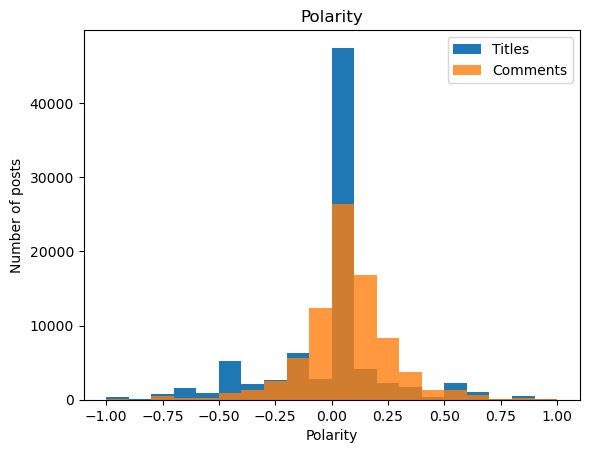

In [18]:
plt.hist(all_data2['polarity_title'], bins=20,label='Titles')
plt.hist(all_data2['polarity_comment'], bins=20,alpha=0.8,label='Comments')
plt.xlabel('Polarity')
plt.ylabel('Number of posts')
plt.title('Polarity')
plt.legend();

In [19]:
title_polarity_sorted=all_data2[['title','lemmatized_title','polarity_title']].sort_values(by='polarity_title',ascending=True)
comment_polarity_sorted=all_data2[['comment_body','lemmatized_comment','polarity_comment']].sort_values(by='polarity_comment',ascending=True)

In [20]:
pos_polt = title_polarity_sorted[title_polarity_sorted['polarity_title'] == 1.0].reset_index(drop=True)
neg_polt = title_polarity_sorted[title_polarity_sorted['polarity_title'] == -1.0].reset_index(drop=True)
pos_polc = comment_polarity_sorted[comment_polarity_sorted['polarity_comment'] == 1.0].reset_index(drop=True)
neg_polc = comment_polarity_sorted[comment_polarity_sorted['polarity_comment'] == -1.0].reset_index(drop=True)

In [21]:
def words(dataframe,string,string2):
    res = top10_bagofwords(dataframe[string], "top")
    plt.figure(figsize=(12,6))
    sns.barplot(x=res['word'][:10], y=res['count'][:10], palette = 'inferno')
    plt.title(string2) 
    plt.show();

C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


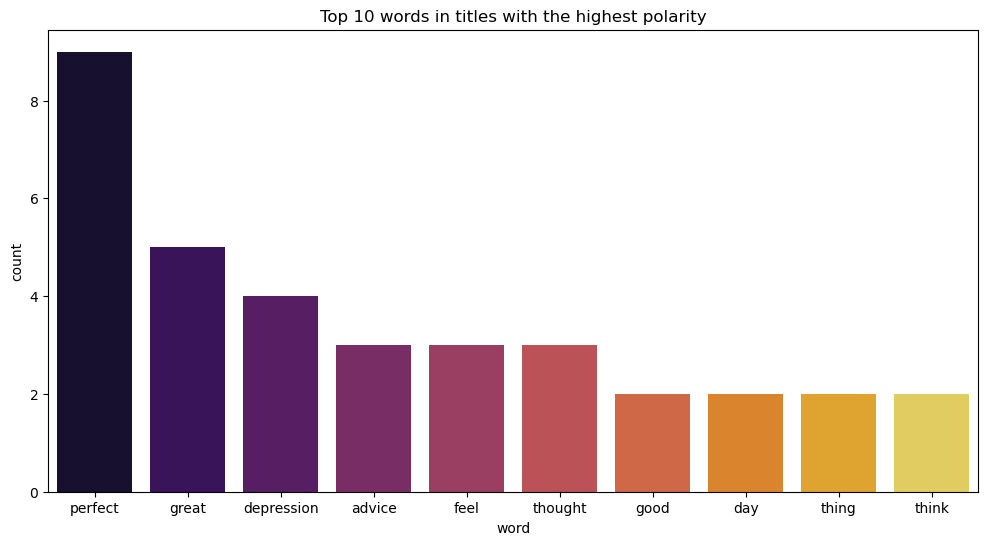

In [22]:
words(pos_polt,'lemmatized_title','Top 10 words in titles with the highest polarity')

C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


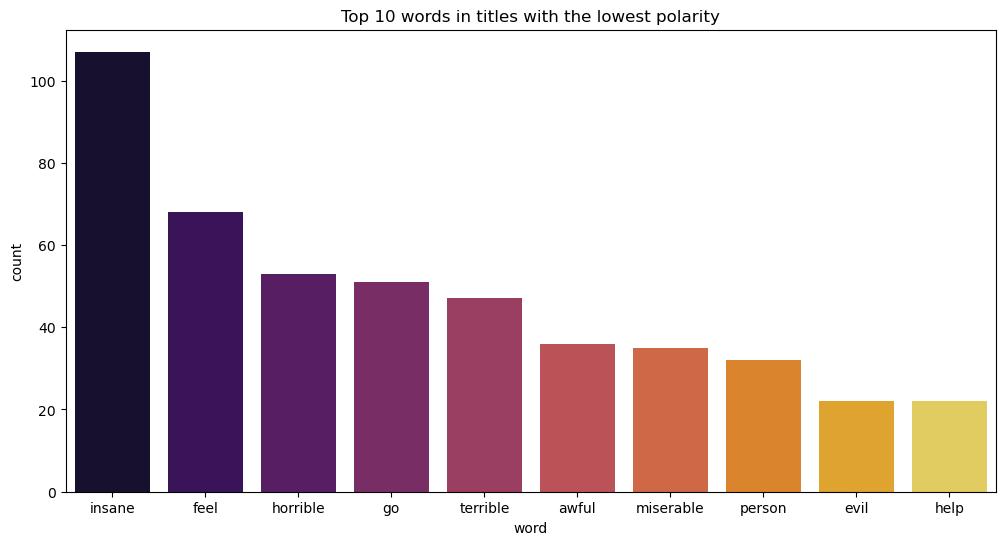

In [23]:
words(neg_polt,'lemmatized_title','Top 10 words in titles with the lowest polarity')

C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


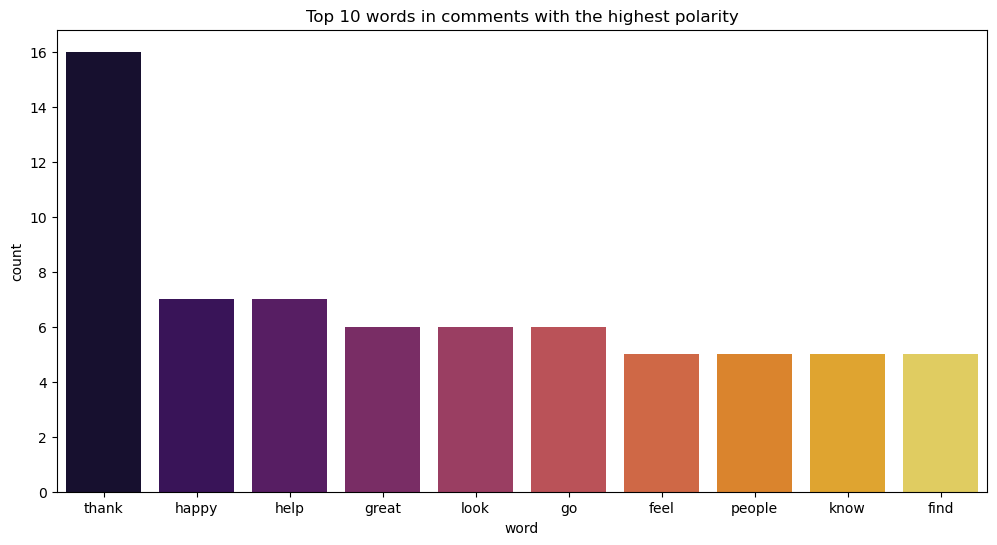

In [24]:
words(pos_polc,'lemmatized_comment','Top 10 words in comments with the highest polarity')

C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


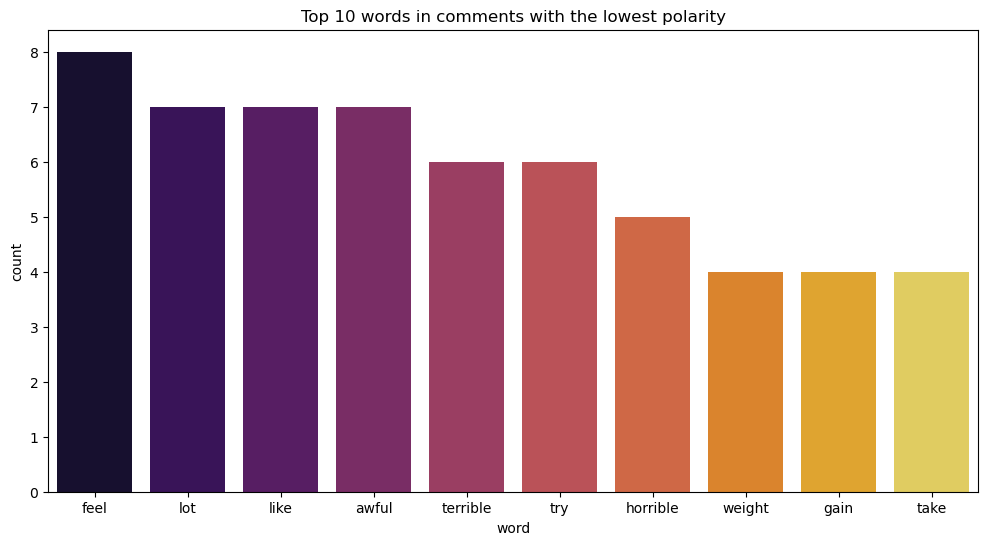

In [25]:
words(neg_polc,'lemmatized_comment','Top 10 words in comments with the lowest polarity')

In [26]:
# Determining subjectivity
all_data2['subjectivity_title']=all_data2['lemmatized_title'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
all_data2['subjectivity_comment']=all_data2['lemmatized_comment'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

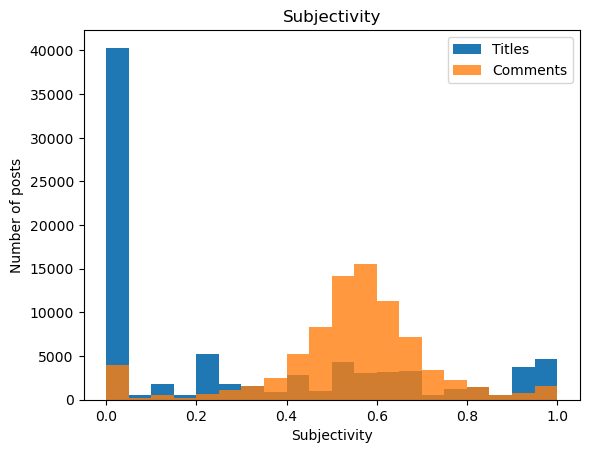

In [27]:
plt.hist(all_data2['subjectivity_title'], bins=20,label='Titles')
plt.hist(all_data2['subjectivity_comment'], bins=20,alpha=0.8,label='Comments')
plt.xlabel('Subjectivity')
plt.ylabel('Number of posts')
plt.title('Subjectivity')
plt.legend();

In [28]:
all_data2

,title,comment_body,lemmatized_title,lemmatized_comment,polarity_title,polarity_comment,subjectivity_title,subjectivity_comment
0,do you ever feel like not being alive anymore,as for anchors my only anchor is i need to be ...,feel like alive anymore,anchor anchor need successful care mom dad fuc...,0.100000,-0.001190,0.400000,0.751190
1,why do depressed people shave their heads,i don’t know because i never had the urge but ...,depress people shave head,know urge think probably take care hair exhaus...,-0.066667,0.036970,0.033333,0.497619
2,random urge to kill people,you are a coward that can't handle the fact th...,random urge kill people,coward handle fact people well life . stop giv...,-0.500000,0.000000,0.500000,0.000000
3,is slapping my arm when i’m anxious normal?,"'normal' and 'crazy' aren't binary opposites, ...",slap arm anxious normal ?,"' normal ' ' crazy ' binary opposite , scale ....",-0.050000,0.008333,0.825000,0.452778
4,tips to find a psychiatrist that specializes i...,i would assume the majority are aware of anxie...,tip find psychiatrist specialize panic attack ...,assume majority aware anxiety disorder treat ....,0.000000,0.000000,0.000000,0.712963
...,...,...,...,...,...,...,...,...
82560,have you heard of this?,i assume you have some sort of existing medica...,hear ?,assume sort exist medical relationship current...,0.000000,0.071429,0.000000,0.323810
82561,how do i stop my intensity?,i have been diagnosed officially and i am not ...,stop intensity ?,diagnose officially see therapist . abandonmen...,0.000000,0.026563,0.000000,0.632143
82562,does this have a name?,"i asked my councillor but he wasn't too sure, ...",?,"ask councillor sure , mild ocd",0.000000,0.416667,0.000000,0.694444
82563,do schizophrenics 'understand' other schizophr...,i don't think it works that way. i do find tha...,schizophrenic ' understand ' schizophrenic ' '...,think work way . find gravitate people mental ...,0.000000,0.087698,0.000000,0.441270


In [29]:
# checking readability
all_data2['readability_title'] = all_data2['title'].apply(lambda x: textstat.flesch_reading_ease(x))
all_data2['readability_comment'] = all_data2['comment_body'].apply(lambda x: textstat.flesch_reading_ease(x))

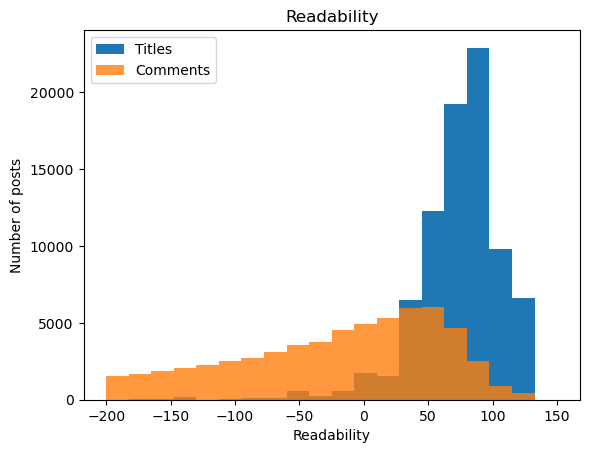

In [30]:
plt.hist(all_data2['readability_title'], bins=20,label='Titles',range=(-200,150))
plt.hist(all_data2['readability_comment'], bins=20,alpha=0.8,label='Comments',range=(-200,150))
plt.xlabel('Readability')
plt.ylabel('Number of posts')
plt.title('Readability')
plt.legend();

# Using Latent Dirichlet Allocation analysis for titles and comments

In [33]:
all_data2

,title,comment_body,lemmatized_title,lemmatized_comment,polarity_title,polarity_comment,subjectivity_title,subjectivity_comment,readability_title,readability_comment
0,feel like alive anymore,anchor anchor need successful care mom dad fuc...,feel like alive anymore,anchor anchor need successful care mom dad fuc...,0.100000,-0.001190,0.400000,0.751190,87.72,-75.36
1,depress people shave head,know urge think probably take care hair exhaus...,depress people shave head,know urge think probably take care hair exhaus...,-0.066667,0.036970,0.033333,0.497619,89.75,-75.70
2,random urge kill people,coward handle fact people well life stop give...,random urge kill people,coward handle fact people well life . stop giv...,-0.500000,0.000000,0.500000,0.000000,83.32,73.51
3,slap arm anxious normal,normal crazy binary opposite scale maybe...,slap arm anxious normal ?,"' normal ' ' crazy ' binary opposite , scale ....",-0.050000,0.008333,0.825000,0.452778,80.28,3.81
4,tip find psychiatrist specialize panic attack ...,assume majority aware anxiety disorder treat ...,tip find psychiatrist specialize panic attack ...,assume majority aware anxiety disorder treat ....,0.000000,0.000000,0.000000,0.712963,42.38,20.73
...,...,...,...,...,...,...,...,...,...,...
82560,hear,assume sort exist medical relationship current...,hear ?,assume sort exist medical relationship current...,0.000000,0.071429,0.000000,0.323810,117.16,54.90
82561,stop intensity,diagnose officially see therapist abandonment...,stop intensity ?,diagnose officially see therapist . abandonmen...,0.000000,0.026563,0.000000,0.632143,73.85,-36.46
82562,,ask councillor sure mild ocd,?,"ask councillor sure , mild ocd",0.000000,0.416667,0.000000,0.694444,117.16,87.05
82563,schizophrenic understand schizophrenic wor...,think work way find gravitate people mental i...,schizophrenic ' understand ' schizophrenic ' '...,think work way . find gravitate people mental ...,0.000000,0.087698,0.000000,0.441270,38.99,-73.00


In [ ]:
all_data2['lemmatized_title'] = all_data2.lemmatized_title.astype('string')
all_data2['lemmatized_comment'] = all_data2.lemmatized_comment.astype('string')

In [55]:
def remove_punctuations(text):
    return text.translate(None,string.punctuation)

In [59]:
all_data2['lemmatized_title'] = all_data2['lemmatized_title'].str.replace('[^\w\s]','')
all_data2['lemmatized_comment'] = all_data2['lemmatized_comment'].str.replace('[^\w\s]','')

<>:1: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
C:\Users\Julia\AppData\Local\Temp\ipykernel_22616\4045545613.py:1: DeprecationWarning: invalid escape sequence \w
  all_data2['lemmatized_title'] = all_data2['lemmatized_title'].str.replace('[^\w\s]','')
C:\Users\Julia\AppData\Local\Temp\ipykernel_22616\4045545613.py:2: DeprecationWarning: invalid escape sequence \w
  all_data2['lemmatized_comment'] = all_data2['lemmatized_comment'].str.replace('[^\w\s]','')
C:\Users\Julia\AppData\Local\Temp\ipykernel_22616\4045545613.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data2['lemmatized_title'] = all_data2['lemmatized_title'].str.replace('[^\w\s]','')
C:\Users\Julia\AppData\Local\Temp\ipykernel_22616\4045545613.py:2: FutureWarning: The default value of regex will change from

In [60]:
all_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82548 entries, 0 to 82564
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 82548 non-null  object 
 1   comment_body          82548 non-null  object 
 2   lemmatized_title      82548 non-null  object 
 3   lemmatized_comment    82548 non-null  object 
 4   polarity_title        82548 non-null  float64
 5   polarity_comment      82548 non-null  float64
 6   subjectivity_title    82548 non-null  float64
 7   subjectivity_comment  82548 non-null  float64
 8   readability_title     82548 non-null  float64
 9   readability_comment   82548 non-null  float64
dtypes: float64(6), object(4)
memory usage: 6.9+ MB


In [61]:
all_data2

,title,comment_body,lemmatized_title,lemmatized_comment,polarity_title,polarity_comment,subjectivity_title,subjectivity_comment,readability_title,readability_comment
0,feel like alive anymore,anchor anchor need successful care mom dad fuc...,feel like alive anymore,anchor anchor need successful care mom dad fuc...,0.100000,-0.001190,0.400000,0.751190,87.72,-75.36
1,depress people shave head,know urge think probably take care hair exhaus...,depress people shave head,know urge think probably take care hair exhaus...,-0.066667,0.036970,0.033333,0.497619,89.75,-75.70
2,random urge kill people,coward handle fact people well life stop give...,random urge kill people,coward handle fact people well life stop give...,-0.500000,0.000000,0.500000,0.000000,83.32,73.51
3,slap arm anxious normal,normal crazy binary opposite scale maybe...,slap arm anxious normal,normal crazy binary opposite scale maybe...,-0.050000,0.008333,0.825000,0.452778,80.28,3.81
4,tip find psychiatrist specialize panic attack ...,assume majority aware anxiety disorder treat ...,tip find psychiatrist specialize panic attack ...,assume majority aware anxiety disorder treat ...,0.000000,0.000000,0.000000,0.712963,42.38,20.73
...,...,...,...,...,...,...,...,...,...,...
82560,hear,assume sort exist medical relationship current...,hear,assume sort exist medical relationship current...,0.000000,0.071429,0.000000,0.323810,117.16,54.90
82561,stop intensity,diagnose officially see therapist abandonment...,stop intensity,diagnose officially see therapist abandonment...,0.000000,0.026563,0.000000,0.632143,73.85,-36.46
82562,,ask councillor sure mild ocd,,ask councillor sure mild ocd,0.000000,0.416667,0.000000,0.694444,117.16,87.05
82563,schizophrenic understand schizophrenic wor...,think work way find gravitate people mental i...,schizophrenic understand schizophrenic wor...,think work way find gravitate people mental i...,0.000000,0.087698,0.000000,0.441270,38.99,-73.00


In [51]:
# remove extra space between tokens
def remove_space(string):
    result = re.sub('\\s+',' ', string)
    return result
all_data2['lemmatized_title'] = all_data2.lemmatized_title.apply(lambda x: remove_space(x))
all_data2['lemmatized_comment'] = all_data2.lemmatized_comment.apply(lambda x: remove_space(x))

In [52]:
# remove digits
all_data2['lemmatized_title'] = all_data2['lemmatized_title'].str.replace('\\d+', '')
all_data2['lemmatized_comment'] = all_data2['lemmatized_comment'].str.replace('\\d+', '')

C:\Users\Julia\AppData\Local\Temp\ipykernel_22616\4125532046.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data2['lemmatized_title'] = all_data2['lemmatized_title'].str.replace('\\d+', '')
C:\Users\Julia\AppData\Local\Temp\ipykernel_22616\4125532046.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data2['lemmatized_comment'] = all_data2['lemmatized_comment'].str.replace('\\d+', '')


In [53]:
all_data2

,title,comment_body,lemmatized_title,lemmatized_comment,polarity_title,polarity_comment,subjectivity_title,subjectivity_comment,readability_title,readability_comment
0,feel like alive anymore,anchor anchor need successful care mom dad fuc...,feel like alive anymore,anchor anchor need successful care mom dad fuc...,0.100000,-0.001190,0.400000,0.751190,87.72,-75.36
1,depress people shave head,know urge think probably take care hair exhaus...,depress people shave head,know urge think probably take care hair exhaus...,-0.066667,0.036970,0.033333,0.497619,89.75,-75.70
2,random urge kill people,coward handle fact people well life stop give...,random urge kill people,coward handle fact people well life . stop giv...,-0.500000,0.000000,0.500000,0.000000,83.32,73.51
3,slap arm anxious normal,normal crazy binary opposite scale maybe...,slap arm anxious normal ?,"' normal ' ' crazy ' binary opposite , scale ....",-0.050000,0.008333,0.825000,0.452778,80.28,3.81
4,tip find psychiatrist specialize panic attack ...,assume majority aware anxiety disorder treat ...,tip find psychiatrist specialize panic attack ...,assume majority aware anxiety disorder treat ....,0.000000,0.000000,0.000000,0.712963,42.38,20.73
...,...,...,...,...,...,...,...,...,...,...
82560,hear,assume sort exist medical relationship current...,hear ?,assume sort exist medical relationship current...,0.000000,0.071429,0.000000,0.323810,117.16,54.90
82561,stop intensity,diagnose officially see therapist abandonment...,stop intensity ?,diagnose officially see therapist . abandonmen...,0.000000,0.026563,0.000000,0.632143,73.85,-36.46
82562,,ask councillor sure mild ocd,?,"ask councillor sure , mild ocd",0.000000,0.416667,0.000000,0.694444,117.16,87.05
82563,schizophrenic understand schizophrenic wor...,think work way find gravitate people mental i...,schizophrenic ' understand ' schizophrenic ' '...,think work way . find gravitate people mental ...,0.000000,0.087698,0.000000,0.441270,38.99,-73.00


In [66]:
all_data2.to_csv("../Data/all_data3.csv", index=False)

In [2]:
all_data3 = pd.read_csv('../Data/all_data3.csv')

In [3]:
all_data3.dropna(inplace=True)

# Processing titles

In [4]:
l1 = list(all_data3.lemmatized_title)
X_title = [el.split() for el in l1]

In [5]:
# Create Dictionary
id2word = corpora.Dictionary(X_title)
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
id2word.filter_extremes(no_below=20, no_above=0.5)
# Create Corpus
texts = X_title
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [6]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.042*"help" + 0.035*"self" + 0.034*"friend" + 0.022*"suicidal" + '
  '0.018*"stop" + 0.018*"harm" + 0.017*"life" + 0.017*"feel" + 0.013*"people" '
  '+ 0.011*"well"'),
 (1,
  '0.035*"mental" + 0.026*"therapy" + 0.026*"know" + 0.022*"health" + '
  '0.022*"disorder" + 0.017*"feel" + 0.017*"help" + 0.015*"want" + '
  '0.014*"work" + 0.014*"way"'),
 (2,
  '0.056*"help" + 0.033*"mental" + 0.023*"need" + 0.022*"bad" + 0.020*"go" + '
  '0.018*"health" + 0.013*"know" + 0.013*"suicide" + 0.013*"feel" + '
  '0.013*"deal"'),
 (3,
  '0.059*"help" + 0.036*"anxiety" + 0.022*"mental" + 0.021*"tell" + '
  '0.020*"depression" + 0.019*"health" + 0.014*"experience" + 0.013*"attack" + '
  '0.012*"take" + 0.012*"good"'),
 (4,
  '0.029*"feel" + 0.027*"depressed" + 0.023*"experience" + 0.018*"stop" + '
  '0.017*"bad" + 0.017*"therapist" + 0.013*"mental" + 0.013*"long" + '
  '0.012*"normal" + 0.011*"like"'),
 (5,
  '0.053*"wrong" + 0.027*"depression" + 0.025*"disorder" + 0.024*"advice" + '
  '0.022*"

In [ ]:
coh_dict = {}
for i in range(1,21):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coh_dict[i] = coherence_lda
    print('Coherence Score: ',i,':', coherence_lda)

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

In [7]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus, id2word)
lda_viz

C:\Users\Julia\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.049578  0.030877       1        1  11.784355
6      0.088321  0.030547       2        1  11.706400
1      0.066741 -0.013596       3        1   9.981711
4     -0.071925  0.042387       4        1   9.826181
3      0.084680 -0.060604       5        1   9.649924
2      0.006172 -0.048259       6        1   9.563888
0     -0.098157 -0.103709       7        1   9.489026
8     -0.007366 -0.019708       8        1   9.411284
7     -0.020252  0.106405       9        1   9.323921
5      0.001364  0.035660      10        1   9.263309, topic_info=       Term         Freq        Total Category  logprob  loglift
76     help  6968.000000  6968.000000  Default  30.0000  30.0000
29    wrong  2517.000000  2517.000000  Default  29.0000  29.0000
2      feel  7115.000000  7115.000000  Default  28.0000  28.0000
3      like  4723.000000  4723.000000  Default  27.0000  27.0000
135  mental  7525.000000  7525.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
117    life   201.445388  2279.428928  Topic10  -4.9604  -0.0471
90      way   160.564513  1293.635045  Topic10  -5.1872   0.2926
166      go   161.962157  2062.965889  Topic10  -5.1786  -0.1654
202   issue   148.665871  1398.731888  Topic10  -5.2642   0.1375
3      like   181.380235  4723.091644  Topic10  -5.0653  -0.8805

[722 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1218      2  0.128503  acceptable
1218      3  0.042834  acceptable
1218      6  0.042834  acceptable
1218      7  0.728183  acceptable
1218     10  0.042834  acceptable
...     ...       ...         ...
34       10  0.081160        year
1224      1  0.725184      zoloft
1224      3  0.009542      zoloft
1224      6  0.229005      zoloft
1224      9  0.028626      zoloft

[3718 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 2, 5, 4, 3, 1, 9, 8, 6])

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

In [8]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [16]:
coh_dict = {}
for i in range(1,21):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coh_dict[i] = coherence_lda
    print('Coherence Score: ',i,':', coherence_lda)

Coherence Score:  1 : 0.23150590115729255
Coherence Score:  2 : 0.16613462060562778
Coherence Score:  3 : 0.11826917763394512
Coherence Score:  4 : 0.12123363972530607
Coherence Score:  5 : 0.1258980651903131
Coherence Score:  6 : 0.12391695139033054
Coherence Score:  7 : 0.13282523911544966
Coherence Score:  8 : 0.12763533899442858
Coherence Score:  9 : 0.12460407354091448
Coherence Score:  10 : 0.1267767910164238
Coherence Score:  11 : 0.13416364252500232
Coherence Score:  12 : 0.13253293268739105
Coherence Score:  13 : 0.13827625451024098
Coherence Score:  14 : 0.1376035680835702
Coherence Score:  15 : 0.1413169058192366
Coherence Score:  16 : 0.14320633512373931
Coherence Score:  17 : 0.1453750092640464
Coherence Score:  18 : 0.14230783870143224
Coherence Score:  19 : 0.1477157139486982
Coherence Score:  20 : 0.14569574014044828


In [12]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

C:\Users\Julia\AppData\Local\Temp\ipykernel_18324\3861351028.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Julia\AppData\Local\Temp\ipykernel_18324\3861351028.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,1.0,"mental, feel, help, like, health, people, anxi...","[feel, like, alive, anymore]"
1,1,0,1.0,"mental, feel, help, like, health, people, anxi...","[depress, people, shave, head]"
2,2,0,1.0,"mental, feel, help, like, health, people, anxi...","[random, urge, kill, people]"
3,3,0,1.0,"mental, feel, help, like, health, people, anxi...","[slap, arm, anxious, normal]"
4,4,0,1.0,"mental, feel, help, like, health, people, anxi...","[tip, find, psychiatrist, specialize, panic, a..."
5,5,0,1.0,"mental, feel, help, like, health, people, anxi...",[cry]
6,6,0,1.0,"mental, feel, help, like, health, people, anxi...","[normal, feel, like]"
7,7,0,1.0,"mental, feel, help, like, health, people, anxi...","[experience, extreme, high, low]"
8,8,0,1.0,"mental, feel, help, like, health, people, anxi...","[feel, like, not, care, not, bother, thing, la..."
9,9,0,1.0,"mental, feel, help, like, health, people, anxi...","[able, stop, take, antidepressant, year]"


# Processing comments

In [18]:
l1 = list(all_data3.lemmatized_comment)
X_comment= [el.split() for el in l1]

In [19]:
# Create Dictionary
id2word = corpora.Dictionary(X_comment)
# Create Corpus
texts = X_comment
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 3), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 4), (12, 1), (13, 1), (14, 2), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [20]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"like" + 0.017*"feel" + 0.013*"help" + 0.011*"try" + 0.011*"go" + '
  '0.010*"think" + 0.010*"time" + 0.010*"know" + 0.010*"thing" + '
  '0.008*"people"'),
 (1,
  '0.015*"like" + 0.012*"feel" + 0.012*"think" + 0.010*"people" + 0.010*"help" '
  '+ 0.009*"know" + 0.008*"want" + 0.007*"thing" + 0.007*"need" + '
  '0.006*"tell"'),
 (2,
  '0.015*"like" + 0.013*"thing" + 0.013*"feel" + 0.012*"help" + 0.011*"think" '
  '+ 0.010*"good" + 0.009*"people" + 0.008*"try" + 0.006*"life" + '
  '0.006*"time"'),
 (3,
  '0.016*"like" + 0.014*"feel" + 0.011*"good" + 0.011*"help" + 0.010*"time" + '
  '0.010*"people" + 0.008*"think" + 0.008*"way" + 0.008*"thing" + '
  '0.007*"know"'),
 (4,
  '0.015*"like" + 0.014*"think" + 0.013*"help" + 0.012*"feel" + 0.011*"people" '
  '+ 0.010*"know" + 0.010*"thing" + 0.010*"want" + 0.009*"time" + '
  '0.009*"good"'),
 (5,
  '0.016*"like" + 0.014*"thing" + 0.014*"feel" + 0.012*"know" + 0.011*"help" + '
  '0.010*"go" + 0.010*"good" + 0.009*"people" + 0.009*

In [21]:
coh_dict = {}
for i in range(1,21):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coh_dict[i] = coherence_lda
    print('Coherence Score: ',i,':', coherence_lda)

Coherence Score:  1 : 0.29531502625155254
Coherence Score:  2 : 0.2953150262515526
Coherence Score:  3 : 0.29890422378045517
Coherence Score:  4 : 0.29994589967877205
Coherence Score:  5 : 0.30043921086200615
Coherence Score:  6 : 0.3007961813622529
Coherence Score:  7 : 0.2990090743100038
Coherence Score:  8 : 0.29881395574149894
Coherence Score:  9 : 0.299702759086115
Coherence Score:  10 : 0.3004868279115499
Coherence Score:  11 : 0.30099521435674315
Coherence Score:  12 : 0.2977015516105042
Coherence Score:  13 : 0.2990232689646579
Coherence Score:  14 : 0.2993183047956644
Coherence Score:  15 : 0.2975890524442297
Coherence Score:  16 : 0.2961966143748477
Coherence Score:  17 : 0.2986383676858421
Coherence Score:  18 : 0.29932056495920584
Coherence Score:  19 : 0.29928182008234466
Coherence Score:  20 : 0.2967905074419475
